## Imports

In [51]:
import pandas as pd
import numpy as np

# SettingWithCopyWarning设置不提示
pd.options.mode.chained_assignment = None

# 显示60个列
pd.set_option('display.max_columns', 60)

import matplotlib.pyplot as plt
# 魔法函数
%matplotlib inline

# 默认字号
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

import seaborn as sns
sns.set(font_scale = 2)

from sklearn.model_selection import train_test_split

# Data Cleaning and Formatting
## Load in the Data and Examine

In [52]:
# 数据读取
data = pd.read_csv('data/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# 展示几行数据
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

## Data Types and Missing Values

In [53]:
# 列信息：数据类型，非缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

## Convert Data to Correct Types

In [54]:
# np.nan可解释为数字
data = data.replace({'Not Available': np.nan})

for col in list(data.columns):
    # 选择应为数字的列
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # 转换类型为float
        data[col] = data[col].astype(float)

In [55]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

## Missing Values

In [56]:
# 按列计算缺失值
def missing_values_table(df):
        # 总缺失值
        mis_val = df.isnull().sum()
        
        # 缺失值占比
        mis_val_percent = mis_val / len(df) * 100
        
        # 结果表
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # 重命名列名
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : '缺失值', 1 : '缺失值占比'})
        
        # 按缺失值占比降序排列
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '缺失值占比', ascending=False).round(1)
        
        # 打印信息
        print ("一共" + str(df.shape[1]) + "列，\n"      
            "其中" + str(mis_val_table_ren_columns.shape[0]) +
              "列有缺失值。")
        
        return mis_val_table_ren_columns

In [57]:
missing_values_table(data)

一共60列，
其中46列有缺失值。


,缺失值,缺失值占比
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [72]:
# 缺失值占比大于50%，删除该列
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['缺失值占比'] > 50].index)
print('删除%d列。' % len(missing_columns))

一共49列，
其中31列有缺失值。
删除0列。


In [73]:
# 删除列
data = data.drop(columns=list(missing_columns))

# Exploratory Data Analysis
## Single Variable Plots

Text(0.5,1,'Energy Star Score分布图')

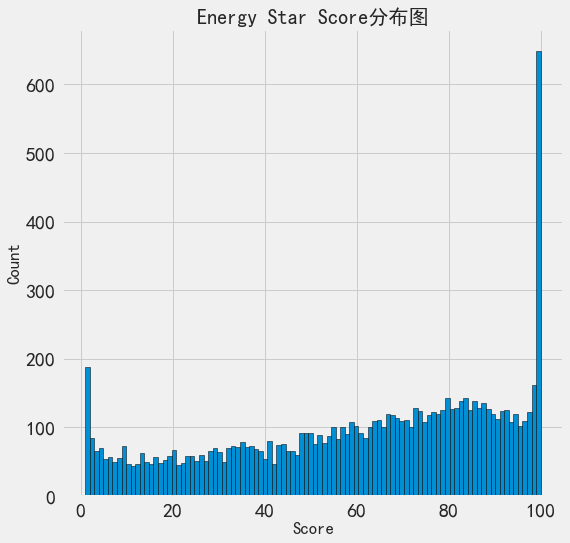

In [74]:
# Energy Star Score分布图
figsize=(8, 8)
data = data.rename(columns = {'ENERGY STAR Score': 'score'})
plt.style.use('fivethirtyeight')
# 正常显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.hist(data['score'].dropna(), bins=100, edgecolor = 'k')
plt.xlabel('Score') # x：分数
plt.ylabel('Count') # y：数量
plt.title('Energy Star Score分布图')

Text(0.5,1,'Site EUI分布图')

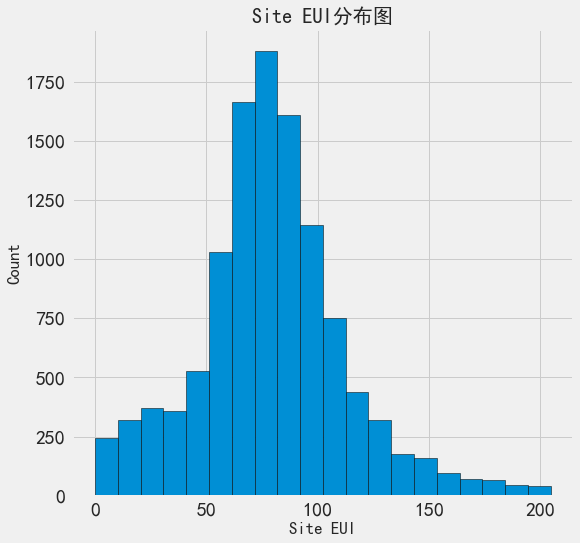

In [75]:
# Site EUI分布图，Energy Use Intensity：能源使用强度，即能源消耗总量除以建筑物的平方英尺
figsize=(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI分布图')
# outliers

In [76]:
data['Site EUI (kBtu/ft²)'].describe()

count    11319.000000
mean        79.086377
std         33.317277
min          0.000000
25%         61.200000
50%         77.800000
75%         95.800000
max        204.800000
Name: Site EUI (kBtu/ft²), dtype: float64

In [77]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)
# 其中一栋建筑远高于其他建筑

3183     201.7
2692     201.9
11719    202.1
10686    202.6
1120     203.5
1570     203.7
5245     204.1
3312     204.7
11105    204.8
1860     204.8
Name: Site EUI (kBtu/ft²), dtype: float64

In [78]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA


## Removing Outliers

In [79]:
# 1/4和3/4分位数
first_quartle = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartle = data['Site EUI (kBtu/ft²)'].describe()['75%']
#四分位间距
iqr = third_quartle - first_quartle
#剔除异常值(根据极端异常值定义)
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartle - 3*iqr)) &
           (data['Site EUI (kBtu/ft²)'] < (third_quartle + 3*iqr))]

Text(0.5,1,'Site EUI分布图')

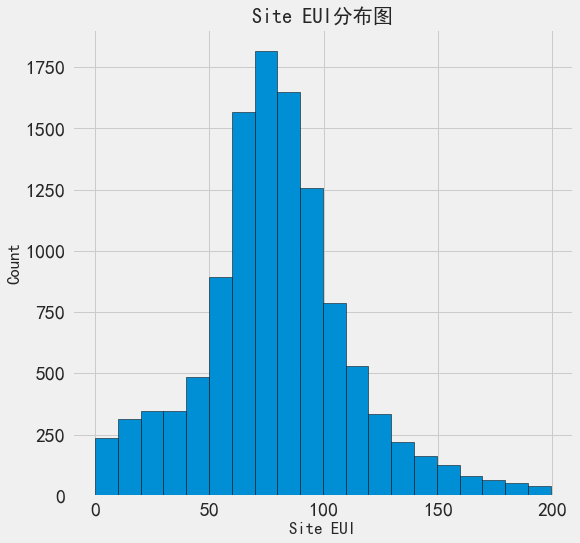

In [80]:
# Site EUI分布图
figsize=(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI分布图')

## Looking for Relationships

In [81]:
# 超过100个观测值的建筑物列表
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

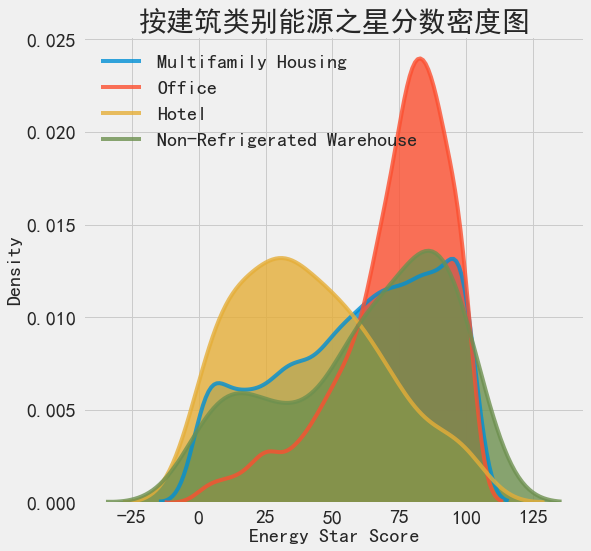

In [82]:
# 建筑物类别分数分布图
figsize=(12, 10)
# 绘制每个建筑物
for b_type in types:
    # 选择建筑类型
    subset = data[data['Largest Property Use Type'] == b_type]
    # 能源之星分数密度图
    sns.kdeplot(subset['score'].dropna(), label = b_type, shade=True, alpha=0.8)

plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('按建筑类别能源之星分数密度图', size = 28);
# 建筑类型对分数有影响

In [69]:
# 行政区划自治市镇对分数的影响
# 超过100个观测值的行政区列表
boroughs= data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5,1,'按行政区划能源之星分数密度图')

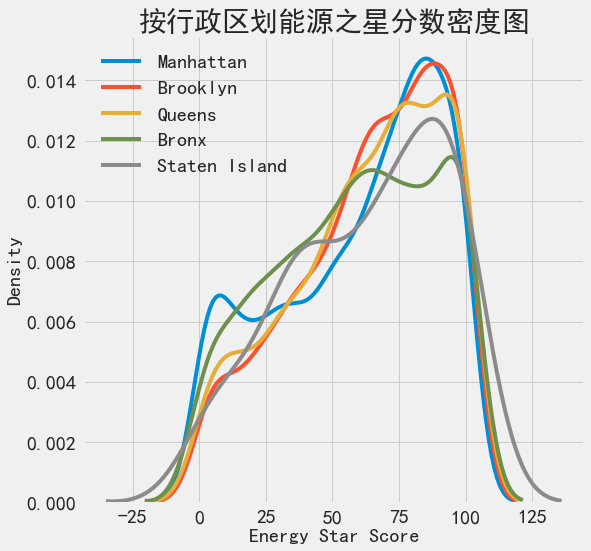

In [83]:
# 行政区分数分布图
figsize=(12, 10)
# 绘制每一个行政区
for borough in boroughs:
    # 选择行政区类型
    subset = data[data['Borough'] == borough]
    # 能源之星分数密度图
    sns.kdeplot(subset['score'].dropna(), label = borough)

plt.xlabel('Energy Star Score', size=20)
plt.ylabel('Density', size=20)
plt.title('按行政区划能源之星分数密度图', size=28)
# 建筑物的行政区对分数的影响没有建筑物类别显著

## Correlations between Features and Target

In [84]:
# Pearson相关系数，衡量两个变量之间的线性关系的强度和方向：值-1表示两个变量完全负相关，+1值表示两个变量完全正相关。
correlations_data = data.corr()['score'].sort_values()
# 负相关
print(correlations_data.head(15), '\n')
# 随着EUI的增加，能源之星评分趋于下降。
# 正相关
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.725004
Weather Normalized Site EUI (kBtu/ft²)                       -0.715050
Weather Normalized Source EUI (kBtu/ft²)                     -0.648714
Source EUI (kBtu/ft²)                                        -0.643767
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358229
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.345605
Direct GHG Emissions (Metric Tons CO2e)                      -0.145514
Weather Normalized Site Natural Gas Use (therms)             -0.134071
Natural Gas Use (kBtu)                                       -0.132596
Year Built                                                   -0.121921
Total GHG Emissions (Metric Tons CO2e)                       -0.111406
Electricity Use - Grid Purchase (kBtu)                       -0.049812
Latitude                                                     -0.048575
Weather Normalized Site Electricity (kWh)                    -0.047389
Proper